<h1 align="middle">
    All the President's Visitors
    </h1>

<center>
<img src="https://live.staticflickr.com/2503/4217661984_fec1fcdf69_b.jpg" alt="White House" width="720" height="576">
</center>

<center class="attribution">"<a target="_blank" rel="noopener noreferrer" href="https://www.flickr.com/photos/59908088@N00/4217661984">White House</a>" by <a target="_blank" rel="noopener noreferrer" href="https://www.flickr.com/photos/59908088@N00">Tom Lohdan</a> is licensed under <a target="_blank" rel="noopener noreferrer" href="https://creativecommons.org/licenses/by/2.0/?ref=openverse">CC BY 2.0 <img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" style="height: 1em; margin-right: 0.125em; display: inline;"></img><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" style="height: 1em; margin-right: 0.125em; display: inline;"></img></a>. </center>

I've never been to The White House, but with the Biden Administration [publishing its visitor log](https://www.whitehouse.gov/disclosures/visitor-logs/), we can see who has.

Following an initiative that began under President Obama, the [Voluntary Disclosure Policy](https://www.whitehouse.gov/voluntary-disclosure/) permits the release of appointment information for visitors who are processed to enter the White House complex, with some exceptions for privacy, national security, purely personal visits, and 'particularly sensitive' meetings.

The Obama administration published more than [3 million records](https://obamawhitehouse.archives.gov/goodgovernment/tools/visitor-records) in its visitors log. The format of the data is similar, and thus provides the best [documentation](https://obamawhitehouse.archives.gov/files/disclosures/visitors/WhiteHouse-WAVES-Key-1209.txt) for columns in the Biden Administration dataset.
As of June 29, visitor log data for Biden is available up to the [end of February](https://www.whitehouse.gov/briefing-room/disclosures/2022/05/31/february-2022-visitor-log-records-posted/).

I want to know more about these appointments:
- Who are the top recurring White House Visitors? 
- Who in Biden's staff hosted the most meetings? 
- How many meetings did Biden host, and who were the top attendees?
- How often are visitors meeting in small-groups vs. large events? 

## Initial data inspection

In [1]:
import numpy as np
import pandas as pd
import calmap
import calplot
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

visitors = pd.concat(
    map(pd.read_csv, ['2021_WAVES-ACCESS-RECORDS.csv','2022.01_WAVES-ACCESS-RECORDS.csv','2022.02_WAVES-ACCESS-RECORDS.csv']), ignore_index=True)

visitors.head()

,NAMELAST,NAMEFIRST,NAMEMID,UIN,BDGNBR,ACCESS_TYPE,TOA,POA,TOD,POD,...,LASTENTRYDATE,TERMINAL_SUFFIX,VISITEE_NAMELAST,VISITEE_NAMEFIRST,MEETING_LOC,MEETING_ROOM,CALLER_NAME_LAST,CALLER_NAME_FIRST,CALLER_ROOM,RELEASEDATE
0,AAKHUU,BOLORMAA,N,U38116,NaN,VA,NaN,NaN,NaN,NaN,...,12/18/2021 11:13,PS,Office,Visitors,WH,EW TOUR,SCHWARTZ,PEYTON,NaN,4/13/2022
1,AASSAR,MIA,L,U37794,NaN,VA,12/17/2021 12:23,NaN,NaN,NaN,...,12/17/2021 11:55,PS,Office,Visitors,WH,EW - RES,SCHWARTZ,PEYTON,NaN,4/13/2022
2,ABALOS,JANILA,L,U38186,NaN,VA,NaN,NaN,NaN,NaN,...,12/19/2021 4:05,KC,COLE,KATIE,WH,EW TOUR,COLE,KATIE,NaN,4/13/2022
3,ABARCAR,KARA,N,U37879,NaN,VA,12/19/2021 17:25,NaN,NaN,NaN,...,12/17/2021 5:21,KC,Office,Visitors,WH,EW TOUR,COLE,KATIE,NaN,4/13/2022
4,ABBOTT,NICOLAS,P,U36630,NaN,VA,NaN,NaN,NaN,NaN,...,12/6/2021 4:41,AG,Mellul,Ian,OEOB,SCA,GIAMMARELLA,ALYSSA,NaN,4/13/2022


In [2]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44752 entries, 0 to 44751
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NAMELAST           44752 non-null  object 
 1   NAMEFIRST          44752 non-null  object 
 2   NAMEMID            44752 non-null  object 
 3   UIN                44752 non-null  object 
 4   BDGNBR             16197 non-null  float64
 5   ACCESS_TYPE        44752 non-null  object 
 6   TOA                30106 non-null  object 
 7   POA                4821 non-null   object 
 8   TOD                2233 non-null   object 
 9   POD                11120 non-null  object 
 10  APPT_MADE_DATE     44752 non-null  object 
 11  APPT_START_DATE    44752 non-null  object 
 12  APPT_END_DATE      44752 non-null  object 
 13  APPT_CANCEL_DATE   348 non-null    object 
 14  TOTAL_PEOPLE       44722 non-null  float64
 15  LAST_UPDATEDBY     44718 non-null  object 
 16  POST               447

### Condensing the data to fit the objective:

<table align="left">
  <tr>
    <th>Column Name(s)</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>NAMELAST, NAMEFIRST, NAMEMID</td>
    <td>Name of the visitor
  </tr>
  <tr>
    <td>VISITEE_NAMELAST, VISITEE_NAMEFIRST</td>
    <td>Name of the appointment host 
  </tr>
  <tr>
      <td>TOTAL_PEOPLE</td>
      <td>Number of people in attendance</td>
  </tr>
  <tr>
    <td>APPT_MADE_DATE, APPT_START_DATE, APPT_END_DATE, APPT_CANCEL_DATE</td>
    <td>When the meeting occurred</td>
  </tr>
</table>

In [3]:
#I think it's easier to read column names in snakecase
visitors.columns = visitors.columns.str.lower()

narrowed_cols = ['namelast', 'namefirst', 'namemid', 'appt_made_date', 'appt_start_date', 'appt_end_date', 'appt_cancel_date', 'total_people', 
             'visitee_namelast', 'visitee_namefirst']
#The dataframe can be narrowed to the selected columns
vis_df = visitors[narrowed_cols]
vis_df.head()

,namelast,namefirst,namemid,appt_made_date,appt_start_date,appt_end_date,appt_cancel_date,total_people,visitee_namelast,visitee_namefirst
0,AAKHUU,BOLORMAA,N,12/18/2021 11:13,12/19/2021,12/19/2021 11:59,NaN,55.0,Office,Visitors
1,AASSAR,MIA,L,12/17/2021 11:55,12/17/2021,12/17/2021 11:59,NaN,27.0,Office,Visitors
2,ABALOS,JANILA,L,12/19/2021 4:05,12/19/2021,12/19/2021 11:59,NaN,1.0,COLE,KATIE
3,ABARCAR,KARA,N,12/17/2021 5:21,12/19/2021,12/19/2021 11:59,NaN,83.0,Office,Visitors
4,ABBOTT,NICOLAS,P,12/6/2021 4:41,12/6/2021,12/6/2021 11:59,NaN,15.0,Mellul,Ian


## Data Cleaning

### Identifying missing_values

namelast                 0
namefirst                0
namemid                  0
appt_made_date           0
appt_start_date          0
appt_end_date            0
appt_cancel_date     44404
total_people            30
visitee_namelast      6491
visitee_namefirst        2
dtype: int64


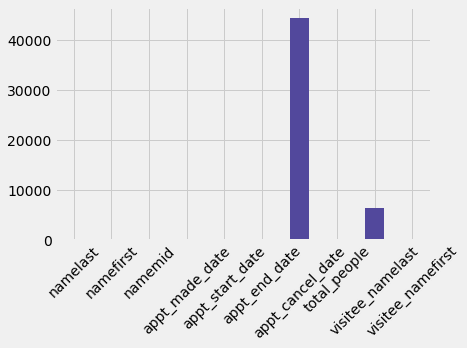

In [4]:
#First let's check out the null values in the selected columns

print(vis_df.isnull().sum())
plt.style.use('fivethirtyeight')
vis_df.isnull().sum().plot(kind='bar', color='#52489C')
plt.xticks(rotation = 45)
plt.show()

### Null cancel dates

Missing values in `appointment_cancel_date` indicate that the meeting happened. 

Less than 1% of meetings were canceled. We don't want to analyze this because we only want the meetings that actually occurred.

After removing those rows, we won't need the column any longer. 

In [5]:
#Dropping canceled appointments

vis_df = vis_df.drop(vis_df[vis_df['appt_cancel_date'].notnull() == True].index)

vis_df['appt_cancel_date'].notnull().sum()

0

In [6]:
#removing the column altogether
vis_df = vis_df.drop(['appt_cancel_date'], axis=1)
vis_df.head()

,namelast,namefirst,namemid,appt_made_date,appt_start_date,appt_end_date,total_people,visitee_namelast,visitee_namefirst
0,AAKHUU,BOLORMAA,N,12/18/2021 11:13,12/19/2021,12/19/2021 11:59,55.0,Office,Visitors
1,AASSAR,MIA,L,12/17/2021 11:55,12/17/2021,12/17/2021 11:59,27.0,Office,Visitors
2,ABALOS,JANILA,L,12/19/2021 4:05,12/19/2021,12/19/2021 11:59,1.0,COLE,KATIE
3,ABARCAR,KARA,N,12/17/2021 5:21,12/19/2021,12/19/2021 11:59,83.0,Office,Visitors
4,ABBOTT,NICOLAS,P,12/6/2021 4:41,12/6/2021,12/6/2021 11:59,15.0,Mellul,Ian


### Something is odd about `appt_end_date`.

In each of these first five rows, the time in `appt_end_date` is 11:59. This indicates that the dataframe does not provide a reliable comparison of times.

Appointment columns should be converted to the datetime type with only the dates for an easier comparison later on. 

In [7]:
#Changing to datetime and removing the times. 
appt_cols = ['appt_made_date','appt_start_date','appt_end_date']

for col in vis_df[appt_cols]:
    vis_df[col] = pd.to_datetime(pd.to_datetime(vis_df[col]).dt.date)
vis_df[appt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44404 entries, 0 to 44751
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   appt_made_date   44404 non-null  datetime64[ns]
 1   appt_start_date  44404 non-null  datetime64[ns]
 2   appt_end_date    44404 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.4 MB


### Null values for total people

Missing `total_people` is trickier. We don't want to remove every row where it's missing, because the names are still valuable. 

We don't want to assume how many people attended the meeting, but every value should be a number. 

In this case null values can be changed to "0" which can indicate that the total_people is unknown. 
When analyzing `total_people` independently, these values can be removed from the analysis.

In [8]:
#changing null values to 0
vis_df['total_people'].fillna(0) 

#dtype should be integers, can't have half a person!
vis_df['total_people'] = vis_df['total_people'].astype('int')
vis_df['total_people'].isnull().sum()

0

### Missing visitee names

Null values in `visitee_namefirst` are outliers, and do not contribute to the main objective of analyzing who visited the White House. They can be dropped. 

`visitee_namelast` is a different story. There are thousands of missing values there, which need to be inspected further. 

In [9]:
#Isolating the two missing first names
vis_df[vis_df['visitee_namefirst'].isnull()]

,namelast,namefirst,namemid,appt_made_date,appt_start_date,appt_end_date,total_people,visitee_namelast,visitee_namefirst
32672,ABEBE,ALEMU,M,2021-07-24,2021-07-24,2021-07-24,1,-,NaN
41528,JACQUET,RONALD,P,2022-01-05,2022-01-06,2022-01-06,1,NaN,NaN


In [10]:
#Can't assume who they met with. It's best to remove those meetings. 
vis_df = vis_df.dropna(subset=['visitee_namefirst'])
vis_df['visitee_namefirst'].isnull().sum()

0

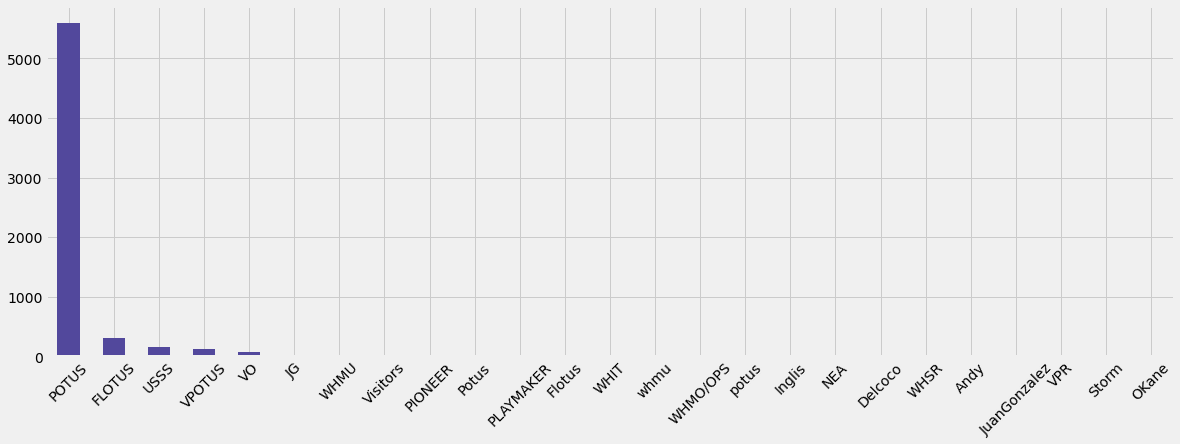

In [11]:
#Plotting the occurrence of first names in the cases where a last name is missing
vis_df[vis_df['visitee_namelast'].isnull()]['visitee_namefirst'].value_counts().head(25).plot(kind='bar', color='#52489C', figsize=(18,6))
plt.xticks(rotation = 45)
plt.show()

### Observations and next steps:

1. The top visitees (with missing last names) include notable acronyms
- POTUS = President of the United States
- FLOTUS = First Lady of the United States
- USSS = United States Secret Service
- VPOTUS = Vice President of the United States
- VO = Visitors Office (A generic label for folks who visit the white house [on tour](https://en.wikipedia.org/wiki/White_House_Visitors_Office).
- JG = Juan Gonzales (considering 'JuanGonzales' is also an entry, and he holds the [position](https://twitter.com/Cartajuanero?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) of Special Assistant to POTUS
- WHMO = White House Medical Office
2. The values are case sensitive, but are entered inconsistently, they will need to be case-standardized.
3. We'll need to combine like-named entries, such as VP and VPOTUS

### Case standardization and combining names into one column

It's easier to analyze full names, so instead of `visitee_namefirst` and `visitee_namelast`, we will end up with `visitee_fullname`. 

In [12]:
#let's get fullnames for visitors first

vis_copy = vis_df.copy()

#New column with more professional looking names
vis_copy['visitor_fullname'] = vis_copy['namefirst'] + ' ' + vis_copy['namemid'] + '. ' +  vis_copy['namelast']
vis_copy['visitor_fullname'] = vis_copy['visitor_fullname'].str.title()

vis_copy['visitor_fullname'].value_counts().head()

Elsie N. Stecker       105
Amy K. Lanasa          100
Tiffany J. Ramseyer     66
Joshua A. Collins       59
Andrew J. Rollo         42
Name: visitor_fullname, dtype: int64

In [13]:
""" Before combining visitee first and last name, the null values need to be replaced.
    Without this step, we'd lose all of the values for POTUS, FLOTUS, etc. 
"""
vis_copy['visitee_namelast'] = vis_copy['visitee_namelast'].fillna(" ") #fill with a space before merging first/last name. This space will be removed in the next step.

vis_copy['visitee_namelast'].isnull().sum()

0

In [14]:
vis_copy['visitee_fullname'] = vis_copy['visitee_namefirst'] + ' ' + vis_copy['visitee_namelast']
vis_copy['visitee_fullname'] = vis_copy['visitee_fullname'].str.lower().str.strip().str.title() #removing the space added above

vis_copy['visitee_fullname'].value_counts().head()

Visitors Office    9663
Potus              5608
Dan Via            1545
Jessika Vallejo    1361
David Nelson        903
Name: visitee_fullname, dtype: int64

### Addressing different entries for the same person

Identifying variations of names in `visitee_fullname` is difficult, because it's not clear what all the variations are. 

Nevertheless, we can identify and standardize those instances. 

In [15]:
#An example of duplicate entries is the VP:
vis_copy[vis_copy['visitee_fullname'].str.contains('Vp') == True]['visitee_fullname'].value_counts()

Vpotus        131
Usa Vpotus      2
Vpr             2
Vp              1
Vp Harris       1
Name: visitee_fullname, dtype: int64

In [16]:
#We can proceed with standardizing, I tracked down some of the big discrepancies and fixed them up here.

vp = ['Usa Vpotus', 'Vpr', 'Vp', 'Vp Harris', 'Vpotus']
flotus = ['First Lady', 'Flotus']
jg = ['Jg', 'Juangonzalez']
vo = ['Vo', 'Visitors']

for v in vp:
    vis_copy = vis_copy.replace({'visitee_fullname':{v: 'Kamala Harris'}})
for f in flotus:
    vis_copy = vis_copy.replace({'visitee_fullname':{f: 'Jill Biden'}})
for j in jg:
    vis_copy = vis_copy.replace({'visitee_fullname':{j: 'Juan Gonzalez'}})
for o in vo:
    vis_copy = vis_copy.replace({'visitee_fullname':{o: 'Visitors Office'}})
    
#This is a good time to clean up the rest of the acronyms
vis_copy = vis_copy.replace({'visitee_fullname':{'Potus': 'Joe Biden'}})
vis_copy = vis_copy.replace({'visitee_fullname':{'Usss': 'U.S. Secret Service'}})
    
vis_copy['visitee_fullname'].value_counts()

Visitors Office         9751
Joe Biden               5608
Dan Via                 1545
Jessika Vallejo         1361
David Nelson             903
                        ... 
Mr. Onstott                1
Matthew Guggenheimer       1
Dr. Brian                  1
It/Oa                      1
Heather Price              1
Name: visitee_fullname, Length: 1513, dtype: int64

In [17]:
#As a final check for mistyped visitees, I want to check entries with no space, since we trimmed whitespace earlier, this picks up values that are only one word.

vis_copy[vis_copy['visitee_fullname'].str.contains(' ') == False]['visitee_fullname'].value_counts()

Whmu              26
Pioneer           13
Playmaker          8
Whit               4
Nea                3
Whmo/Ops           3
Inglis             3
Delcoco            3
Andy               2
Storm              2
Whsr               2
Conley             1
Tozier             1
Communications     1
Oa/It              1
Security           1
It/Oa              1
Bell-Carter        1
Neuberger          1
Dinsmore           1
Jason              1
Mm                 1
Gelfond            1
Tour               1
Orientation        1
David              1
Okane              1
Name: visitee_fullname, dtype: int64

### These rows can be dropped, here's why:

<strong>Disclaimer: This will need to be re-confirmed upon each monthly data release from the White House </strong>

- WHMU stands for [White House Medical Unit](https://en.wikipedia.org/wiki/White_House_Medical_Unit), this isn't important for the analysis of the administration. 
- 'Pioneer' and 'Playmaker' are code names that are impossible to attribute
- The rest are single names or departments. Some may be possible to track down, but the impact of removing these rows is insignificant to the objective of analyzing visitees. 

In [18]:
# Dropping discrepancy names
vis_copy = vis_copy.drop(vis_copy[vis_copy['visitee_fullname'].str.contains(' ') == False].index, axis=0)
    
vis_copy[vis_copy['visitee_fullname'].str.contains(' ') == False]

,namelast,namefirst,namemid,appt_made_date,appt_start_date,appt_end_date,total_people,visitee_namelast,visitee_namefirst,visitor_fullname,visitee_fullname


In [19]:
#We're done manipulating values in the dataset so we can narrow to the columns we need.

cols_to_drop = ['namelast', 'namefirst', 'namemid', 'visitee_namelast', 'visitee_namefirst']
vis_copy.drop(cols_to_drop, axis=1, inplace=True)

final_vis = vis_copy

final_vis.head()


,appt_made_date,appt_start_date,appt_end_date,total_people,visitor_fullname,visitee_fullname
0,2021-12-18,2021-12-19,2021-12-19,55,Bolormaa N. Aakhuu,Visitors Office
1,2021-12-17,2021-12-17,2021-12-17,27,Mia L. Aassar,Visitors Office
2,2021-12-19,2021-12-19,2021-12-19,1,Janila L. Abalos,Katie Cole
3,2021-12-17,2021-12-19,2021-12-19,83,Kara N. Abarcar,Visitors Office
4,2021-12-06,2021-12-06,2021-12-06,15,Nicolas P. Abbott,Ian Mellul


In [20]:
final_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44317 entries, 0 to 44751
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appt_made_date    44317 non-null  datetime64[ns]
 1   appt_start_date   44317 non-null  datetime64[ns]
 2   appt_end_date     44317 non-null  datetime64[ns]
 3   total_people      44317 non-null  int32         
 4   visitor_fullname  44317 non-null  object        
 5   visitee_fullname  44317 non-null  object        
dtypes: datetime64[ns](3), int32(1), object(2)
memory usage: 2.2+ MB


## Analysis

### How many people visited the White House on tour compared to meeting with individuals?

In [21]:
#setting up a df to manipulate
visitee_counts = final_vis['visitee_fullname'].value_counts().to_frame().reset_index()
visitee_counts.head()

,index,visitee_fullname
0,Visitors Office,9751
1,Joe Biden,5608
2,Dan Via,1545
3,Jessika Vallejo,1361
4,David Nelson,903


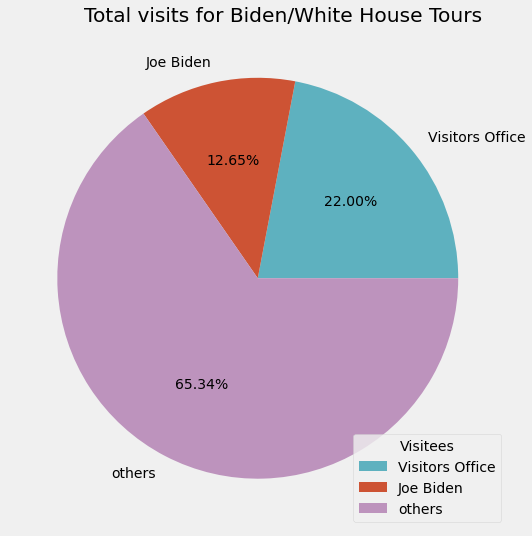

In [22]:
#isolating Tours / Biden separately
top2 = visitee_counts[:2].copy()
#combining other values into one count
others = pd.DataFrame(data = {
    'index' : ['others'],
    'visitee_fullname' : [visitee_counts['visitee_fullname'][2:].sum()]
})
#bringing the two together
top2 = pd.concat([top2, others], ignore_index=True)

#top2.plot.pie(y='visitee_fullname')
names = [name for name in top2['index']] 
fig, ax = plt.subplots(figsize=(8,10))
ax.pie(top2['visitee_fullname'], labels=names, autopct='%.2f%%', colors=['#5EB1BF', '#CD5334', '#BD93BD'])
ax.set_title('Total visits for Biden/White House Tours', x=.55)
plt.legend(title='Visitees', loc='lower right')
plt.show()

### Among other hosts: Who had the most visits? Who had the most unique visitors?

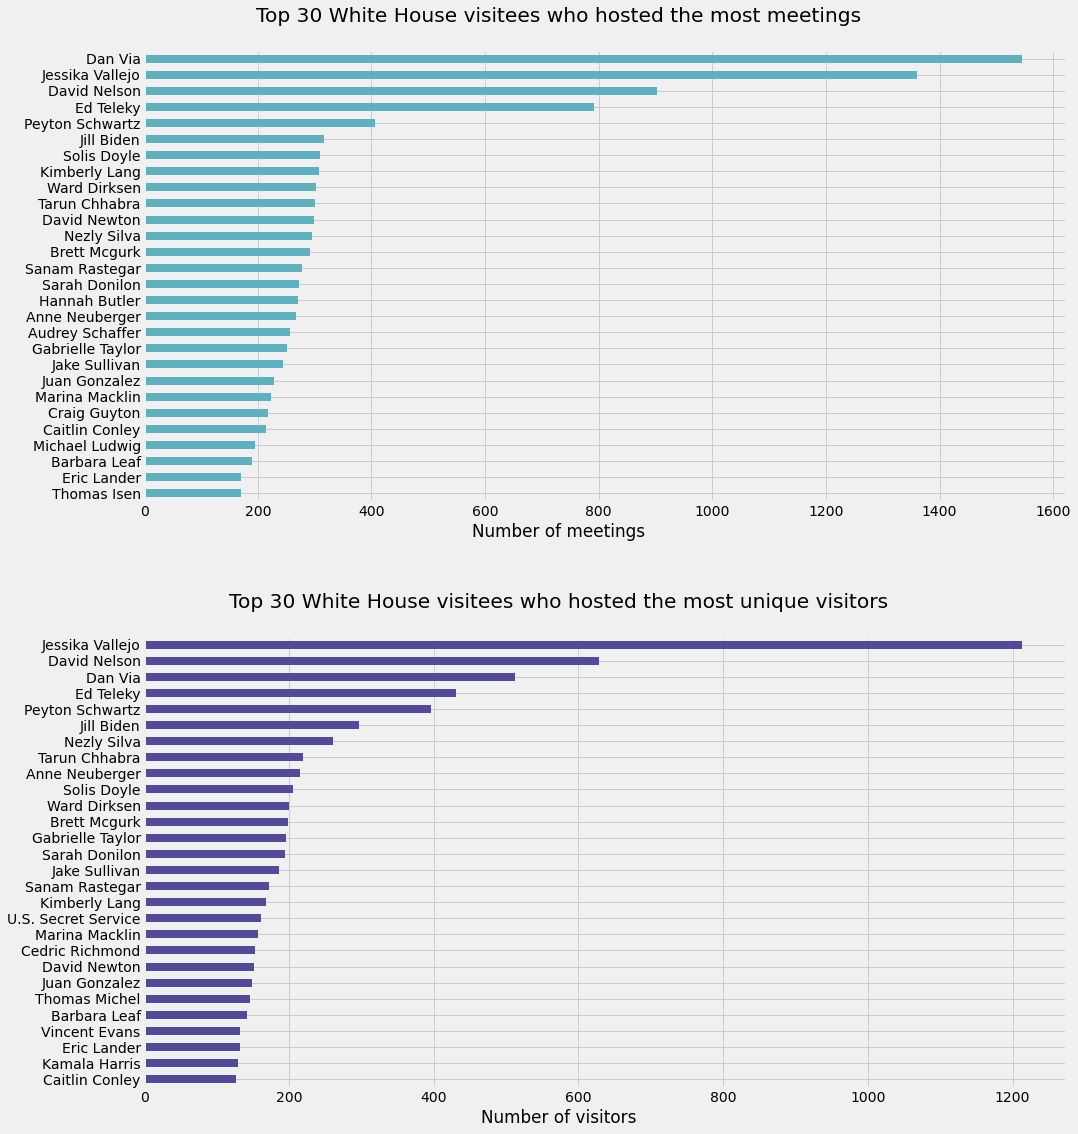

In [23]:
#plot the top 30 visits & unique visitors for visitees among other visitors
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,18))
final_vis['visitee_fullname'].value_counts().head(30).iloc[2:].sort_values().plot(kind='barh', ax=ax1, color='#5EB1BF')
ax1.set_title('Top 30 White House visitees who hosted the most meetings', x=.45, y=1.05)
ax1.set_xlabel('Number of meetings', x=.45)

final_vis.groupby('visitee_fullname')['visitor_fullname'].nunique().sort_values(ascending=False).head(30).iloc[2:].sort_values().plot(kind='barh', ax=ax2, color='#524B9C')
ax2.set_title('Top 30 White House visitees who hosted the most unique visitors', x=.45, y=1.05)
ax2.set_xlabel('Number of visitors', x=.45)
ax2.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
                    
plt.show()

### Turning to the visitors, who visited the White House the most?

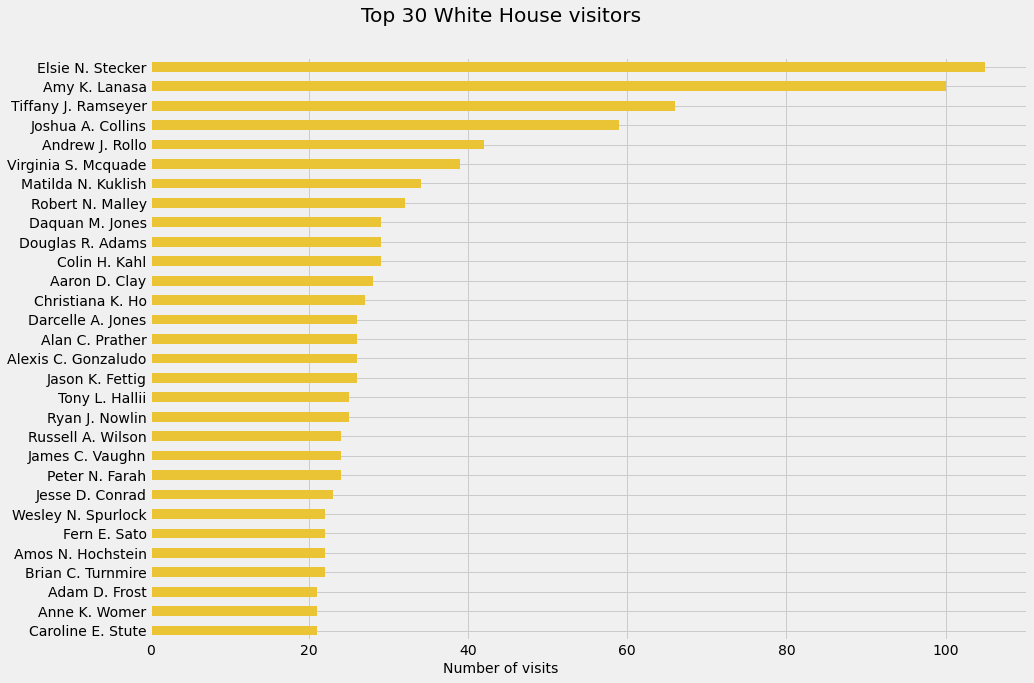

In [24]:
fig, ax = plt.subplots(figsize=(14,10))
final_vis['visitor_fullname'].value_counts().head(30).sort_values().plot(kind='barh', color='#EAC435')
ax.set_title('Top 30 White House visitors', x=0.4, y=1.05)
plt.xlabel('Number of visits', fontsize=14, x=0.4)
plt.show()

### Let's hone in on the president's visitors specifically. 

In [25]:
biden = final_vis[final_vis['visitee_fullname'] == 'Joe Biden']

#how many unique visitors/total visits
print('President Biden has hosted', len(pd.unique(biden['visitor_fullname'])), 'unique visitors and', len(biden['visitor_fullname']), 'total visits.')

President Biden has hosted 4776 unique visitors and 5608 total visits.


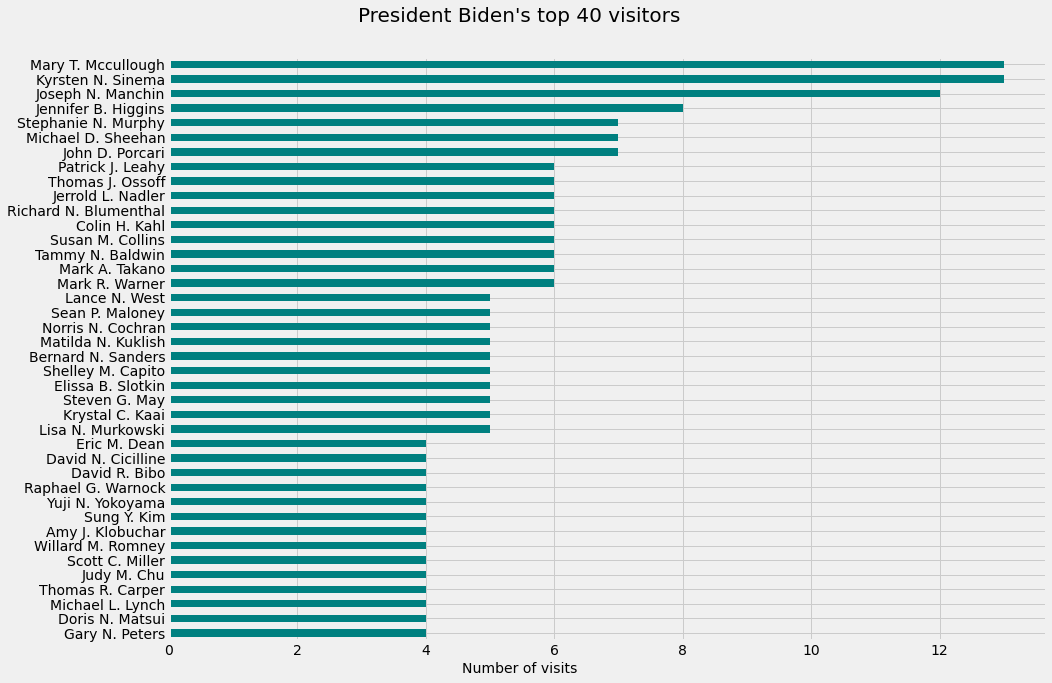

In [26]:
#Who visited Biden the most?
biden['visitor_fullname'].value_counts().head(40).sort_values().plot(kind='barh', figsize=(14,10), color='teal')
plt.title("President Biden's top 40 visitors", fontsize=20, x=0.4, y=1.05)
plt.xlabel('Number of visits', fontsize=14, x=0.4)
plt.show()

### When were the president's visits?

In [27]:
biden['appt_start_date'].value_counts().head(30)

2021-07-04    1177
2021-11-15     787
2021-12-01     203
2021-08-05     156
2021-07-02     149
2021-12-05     147
2021-07-20     139
2021-12-20     138
2021-11-19     135
2021-12-21     124
2022-02-02     114
2021-11-08     103
2021-06-25      94
2021-08-25      83
2021-05-21      82
2021-06-17      77
2021-05-20      75
2021-10-08      73
2021-07-26      72
2021-07-22      69
2021-09-24      68
2021-11-11      66
2021-11-18      64
2021-09-08      63
2021-07-15      53
2021-08-23      50
2022-01-29      40
2021-04-16      33
2021-04-08      33
2021-03-12      30
Name: appt_start_date, dtype: int64

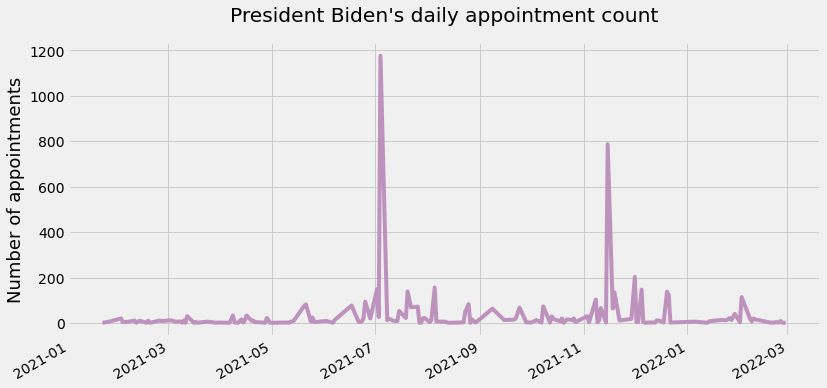

In [28]:
biden['appt_start_date'].value_counts().plot(figsize=(12,6), color='#BD93BD')
plt.title("President Biden's daily appointment count", y=1.05)
plt.ylabel('Number of appointments', fontsize=18)
plt.show()

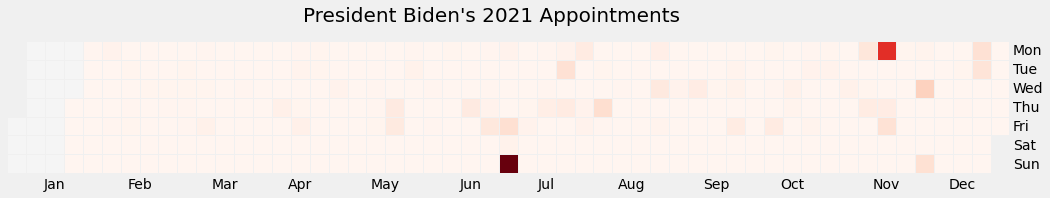

In [29]:
#making a calendar heatmap

plt.figure(figsize=(16,8))
calmap.yearplot(data=biden['appt_start_date'].value_counts(), year=2021)
plt.suptitle("President Biden's 2021 Appointments", y=0.65, fontsize=20)
plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


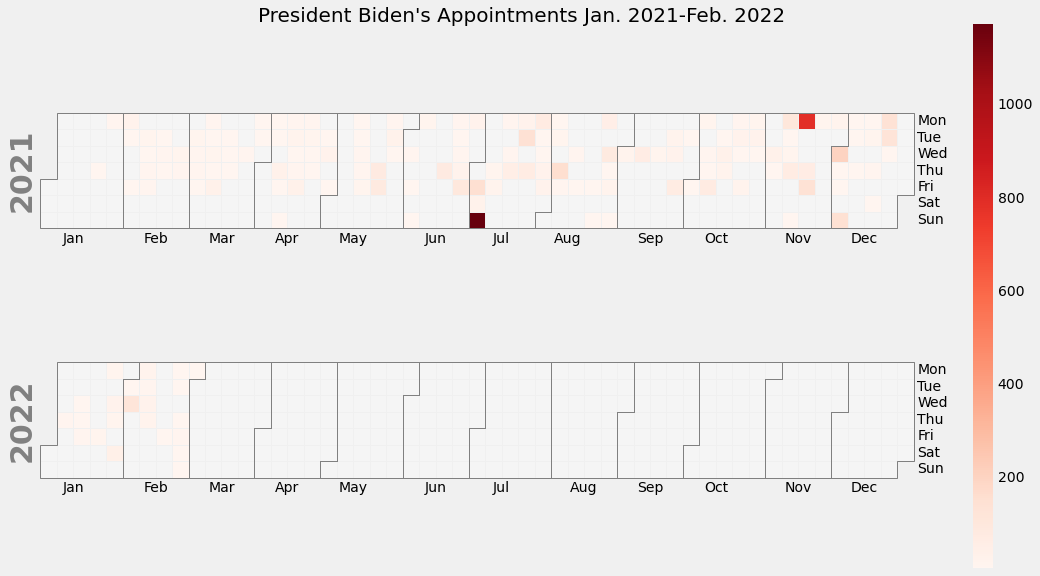

In [30]:
calplot.calplot(data=biden['appt_start_date'].value_counts(), cmap="Reds", figsize=(16,8))
plt.suptitle("President Biden's Appointments Jan. 2021-Feb. 2022", y=1, x=0.46, fontsize=20)
plt.show()

### How long are these meetings planned in advance?

Text(0.5, 0, 'Days')

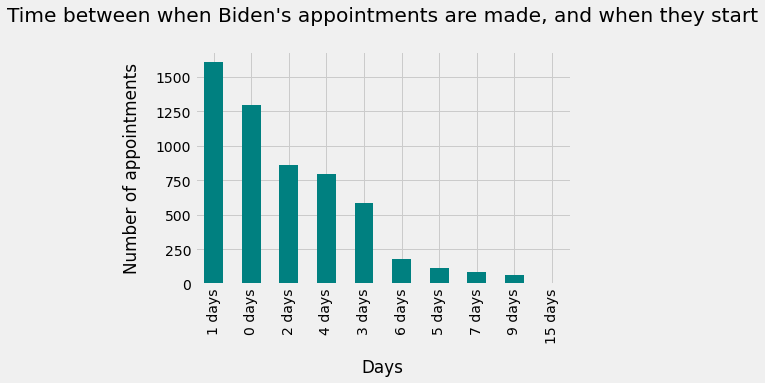

In [31]:
cbiden = biden.copy()
cbiden['appt_time_between'] = (biden['appt_start_date'] - cbiden['appt_made_date']).astype('str')
cbiden['appt_time_between'].value_counts().plot(kind='bar', color='teal')
plt.title("Time between when Biden's appointments are made, and when they start", y=1.1)
plt.ylabel('Number of appointments', labelpad=15)
plt.xlabel('Days', labelpad=15)

### Who attended the most small-group meetings in the White House

This column isn't perfect for analyzing White House data, for example:

In [32]:
biden['total_people'].value_counts().head(20)

1157    1155
420      398
182      233
1        217
214      212
97       188
13       177
2        151
149      143
48       122
60       115
3        107
104      104
10        99
4         95
121       91
11        87
85        84
9         81
8         79
Name: total_people, dtype: int64

1155 is about 22 off from the total appointments on 7-4-2021, let's check that out

In [33]:
biden[biden['appt_start_date'] == pd.to_datetime('2021-07-04')]['total_people'].value_counts()

1157    1155
1         17
3          3
2          2
Name: total_people, dtype: int64

#### `Total_People` is entered inconsistently.
Total_People is entered as the same number for almost every person associated with a given appointment, but sometimes it's off by a few. For instance. 1157 total people should have 1157 rows associated with it, not 1155. 

Perhaps the discrepancy arises because sometimes the visitee is counted as a person, and other times they are not. Given that "1" appears 219 times, it seems like the intent is to NOT count the visitee as a person. 

It would be too cumbersome to correct each entry for total_people, but I still want to use it for something. 

How about looking at groups of five or less? At the very least we can confirm that these attendees were at small meetings.

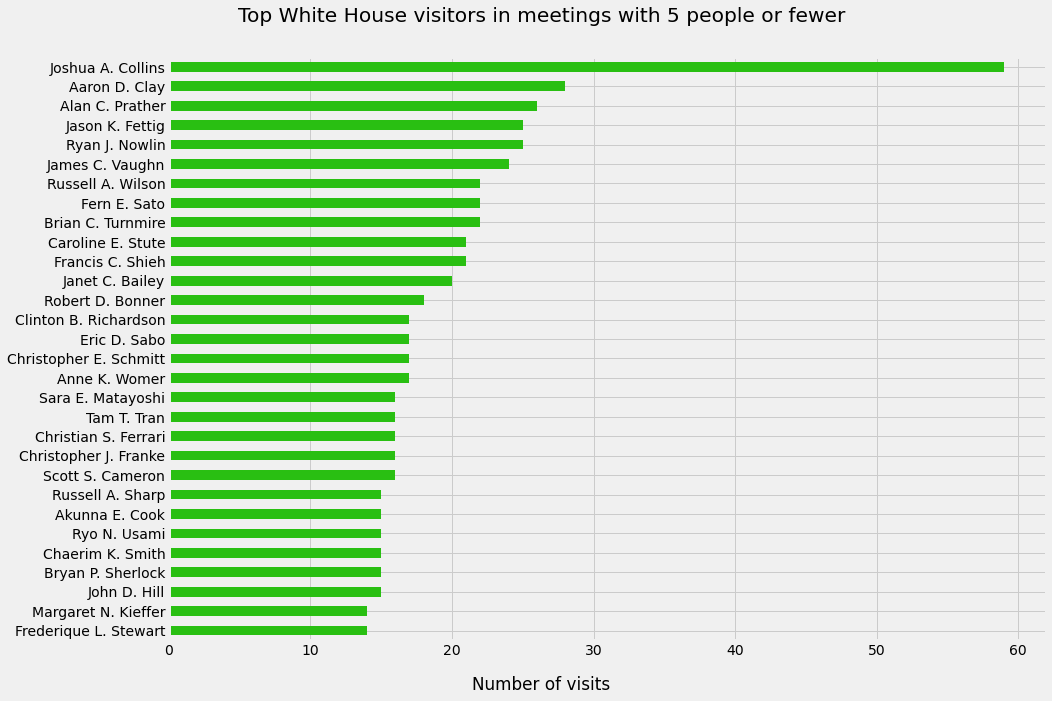

In [34]:
#Looking at small meetings that aren't tours AND not equal to 0 (becauase 0 indicates the value is unknown)
small_meetings = (
    final_vis[(final_vis['total_people'] >= 5) & 
              (final_vis['visitee_fullname'] != 'Visitors Office') & 
              (final_vis['total_people'] != 0)]
)
small_meetings['visitor_fullname'].value_counts().head(30).sort_values().plot(kind='barh', figsize=(14,10), color='#29BF12')
plt.title('Top White House visitors in meetings with 5 people or fewer', x=0.425, y=1.05)
plt.xlabel('Number of visits', x=0.425, labelpad=18)
plt.show()

In [35]:
print('Not including tours, there are',
      len(small_meetings), 'meetings with 5 total people or fewer (including unknown total people) and',
      len(final_vis[final_vis['visitee_fullname'] != 'Visitors Office']), 'meetings with 6 people or more') 

Not including tours, there are 18602 meetings with 5 total people or fewer (including unknown total people) and 34566 meetings with 6 people or more


## Conclusions: 

1. Little more than 1/5 of all White House visitors are there for the official tour. 
2. President Biden alone hosted about 13% of all White House meetings. 
3. Vice President Harris was not in the top 30 for official visits among meeting hosts, and was \#29 for unique visitors.
4. The two conservative-leaning Democratic Senators, Kyrsten Sinema (D-AZ), and Joe Manchin (D-WV) are the \#2 and \#3 top recurring visitors for President Biden. 
5. Biden had two huge spikes in daily appointments. One is July 4, 2021, with 1177 visitors, and Nov 15, 2021, with 787 visitors. Nov 15 is the day that he signed [The Infrastructure Investment and Jobs Act](https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/11/15/remarks-by-president-biden-at-signing-of-h-r-3684-the-infrastructure-investment-and-jobs-act/).
6. The majority of meetings are scheduled, or at least entered into the database, within one week of the start of the appointment. 
7. More than half of all White House Meetings (not including tours) are small meetings with five people or fewer. 
8. Visitee meeting count isn't a complete picture of their meeting activity. This includes screenings to enter the White House, and thus does not include remote meetings or meetings when traveling.

## Potential Next Steps

I didn't recognize many of the names in the visualizations. One path for further analysis would be to categorize each visitor and visitee by finding their wikipedia page if it exists. It will be difficult to research the individuals who appear in this dataset who are not public figures, and likely not very valuable. 

One big area to explore would be to compare some of these conlcusions with the Obama records. Did Biden have fewer than 200 meetings in his first year as vice president?

This analysis did not include meeting room locations, cleaning those up and visualizing locations could be intesting to see where meetings occurred, and who visited multiple rooms.

Lastly, the conclusions may evolve as more data gets released by the White House. They currently release new data at the end of each month. 